In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('campus.csv') # use the correct path to load your csv file into df.
df.drop('Timestamp', axis='columns', inplace=True) # Got rid of time stamp
print(df.shape)
df.head()

(227, 15)


,What is your current year of study,What is your current relationship status?,How do you prefer studying before exams?,Do you do competitive programming?,Which hostel do you live in?,What is your gender?,What is your favourite sport?,Favourite hangout place in campus,Which state/union territory do you belong to?,What is your dept?,What is your preferred coding language?,What is your favourite place to eat at IIT Guwahati?,Which is your favourite club in IIT Guwahati?,Are you satisfied in IIT Guwahati,What is your current cpi?
0,2nd,In a relationship,Pulling of all nighters :),Yes,NaN,Man,Table tennis,IIT G lake (in front of library),Haryana,CSE,C++,Rolls Mania/Tacos,Octaves,No,9.86
1,3rd,Single,Studying on a regular basis,No,Manas,Man,Football,IIT G lake (in front of library),Uttar Pradesh,CST,Python,Hostel Canteen,ml.ai,No,1
2,2nd,Single,Studying on a regular basis,No,Disang,Woman,Badminton,IIT G lake (in front of library),West Bengal,ECE,C,Hostel Mess,Robotics,Maybe,9.3
3,2nd,Single,Pulling of all nighters :),No,NaN,Man,Football,IIT G lake (in front of library),The Government of NCT of Delhi,NaN,Python,Food Court,Coding Club,Maybe,7.5
4,NaN,Single,Studying on a regular basis,No,Lohit,Man,Cricket,IIT G lake (in front of library),Uttar Pradesh,NaN,Java,Hostel Canteen,ml.ai,Yes,8.83


## Making DataFrame easier to work with and Cleaning data
There are some columns where inputs were taken as a short text answer format, obviously these columns have a lot of useless or incompatible entries

CPI column used short text answer format

In [3]:
# Renaming columns with shorter names
df.rename(columns = {'What is your current year of study':'year', 
                     'What is your current relationship status?': 'relationship',
                     'How do you prefer studying before exams?': 'study',
                     'Do you do competitive programming?': 'CP',
                     'Which hostel do you live in?': 'hostel',
                     'What is your gender?': 'gender',
                     'What is your favourite sport?': 'sport',
                     'Favourite hangout place in campus': 'hangout_spot',
                     'Which state/union territory do you belong to?': 'state',
                     'What is your dept?': 'dept',
                     'What is your preferred coding language?': 'coding_lang',
                     'What is your favourite place to eat at IIT Guwahati?': 'fav_place_to_eat',
                     'Which is your favourite club in IIT Guwahati?': 'fav_club',
                     'Are you satisfied in IIT Guwahati': 'satisfied',
                     'What is your current cpi?': 'cpi'}, inplace = True)

df.head()

,year,relationship,study,CP,hostel,gender,sport,hangout_spot,state,dept,coding_lang,fav_place_to_eat,fav_club,satisfied,cpi
0,2nd,In a relationship,Pulling of all nighters :),Yes,NaN,Man,Table tennis,IIT G lake (in front of library),Haryana,CSE,C++,Rolls Mania/Tacos,Octaves,No,9.86
1,3rd,Single,Studying on a regular basis,No,Manas,Man,Football,IIT G lake (in front of library),Uttar Pradesh,CST,Python,Hostel Canteen,ml.ai,No,1
2,2nd,Single,Studying on a regular basis,No,Disang,Woman,Badminton,IIT G lake (in front of library),West Bengal,ECE,C,Hostel Mess,Robotics,Maybe,9.3
3,2nd,Single,Pulling of all nighters :),No,NaN,Man,Football,IIT G lake (in front of library),The Government of NCT of Delhi,NaN,Python,Food Court,Coding Club,Maybe,7.5
4,NaN,Single,Studying on a regular basis,No,Lohit,Man,Cricket,IIT G lake (in front of library),Uttar Pradesh,NaN,Java,Hostel Canteen,ml.ai,Yes,8.83


#### Simplifying/shortening some entries in data

In [4]:
# Renaming some entries in relationship column
print('Unique values in relationship column:')
print(df['relationship'].unique())
print()

df['relationship'].replace('In a relationship', 'relationship', inplace=True)
df['relationship'].replace("It's complicated", 'complicated', inplace=True)

print('Unique values in relationship column after replacements:')
print(df['relationship'].unique())

Unique values in relationship column:
['In a relationship' 'Single' "It's complicated" nan]

Unique values in relationship column after replacements:
['relationship' 'Single' 'complicated' nan]


In [5]:
# Renaming some entries in study column
print('Unique values in study column:')
print(df['study'].unique())
print()

df['study'].replace('Pulling of all nighters :)', 'all_nighters', inplace=True)
df['study'].replace('Studying on a regular basis', 'regular_study', inplace=True)

print('Unique values in study column after replacements:')
print(df['study'].unique())

Unique values in study column:
['Pulling of all nighters :)' 'Studying on a regular basis']

Unique values in study column after replacements:
['all_nighters' 'regular_study']


In [6]:
# Renaming some entries in hangout spot column
print('Unique values in hangout spot column:')
print(df['hangout_spot'].unique())
print()

df['hangout_spot'].replace('IIT G lake (in front of library)', 'IITG_Lake', inplace=True)
df['hangout_spot'].replace('Serpentine Lake 😏', 'serpentine;)', inplace=True)
df['hangout_spot'].replace('Lake in front of the hospital', 'Tihor_lake', inplace=True)
df['hangout_spot'] = df['hangout_spot'].str.replace(' ', '_')

print('Unique values in hangout spot column after replacements:')
print(df['hangout_spot'].unique())

Unique values in hangout spot column:
['IIT G lake (in front of library)' 'Food Court' 'Hostel Canteen' 'Khoka'
 'Serpentine Lake 😏' nan 'New Sac' 'Old Sac' 'Playgrounds'
 'Lake in front of the hospital' 'Market Complex' 'Others']

Unique values in hangout spot column after replacements:
['IITG_Lake' 'Food_Court' 'Hostel_Canteen' 'Khoka' 'serpentine;)' nan
 'New_Sac' 'Old_Sac' 'Playgrounds' 'Tihor_lake' 'Market_Complex' 'Others']


In [7]:
# Some other weird things shortened
df['state'].replace('The Government of NCT of Delhi', 'Delhi', inplace=True)
df['fav_place_to_eat'].replace('None', np.nan, inplace=True)
df['fav_club'].replace('ml.ai', 'iitg.ai', inplace=True)
df['hostel'].replace('Bhramaputra', 'Brahmaputra', inplace=True)

In [8]:
# All non-numeric answers of cpi converted to float
def isfloat(x):
    try:
        float(x)
        return True
    except:
        return False
    
for i in df.index:
    if isfloat(df.loc[i, 'cpi']):
        df.loc[i, 'cpi'] = float(df.loc[i, 'cpi'])
    else:
        df.loc[i, 'cpi'] = np.nan
        
        # Values of cpi outside range 4-10 is considered fake
    if (df.loc[i, 'cpi'] >= 10) | (df.loc[i, 'cpi'] <= 4):
        df.loc[i, 'cpi'] = np.nan

In [9]:
df['cpi'] = df['cpi'].astype('float64')
df['cpi'].isna().sum()

21

# Exploratory Data Ananlysis (EDA)

## Analysing CPI and its correlations

In [10]:
df['cpi'].describe()

count    206.000000
mean       8.129587
std        0.909192
min        4.070000
25%        7.655000
50%        8.235000
75%        8.712500
max        9.900000
Name: cpi, dtype: float64

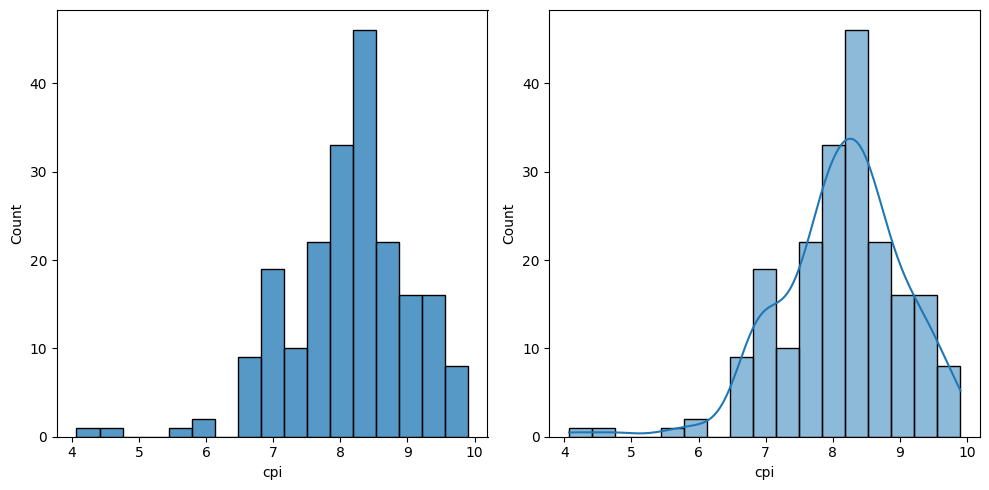

In [29]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.histplot(df['cpi'])

plt.subplot(1,2,2)
sns.histplot(df['cpi'], kde=True)

plt.tight_layout()
plt.show()

### Inference

Most people seem to have CPI in the range of 8.0 to 8.4

### How CPI varies with year of study

Count of students in each year
year
2nd    162
3rd     32
4th     21
1st      8
NaN      4
Name: count, dtype: int64


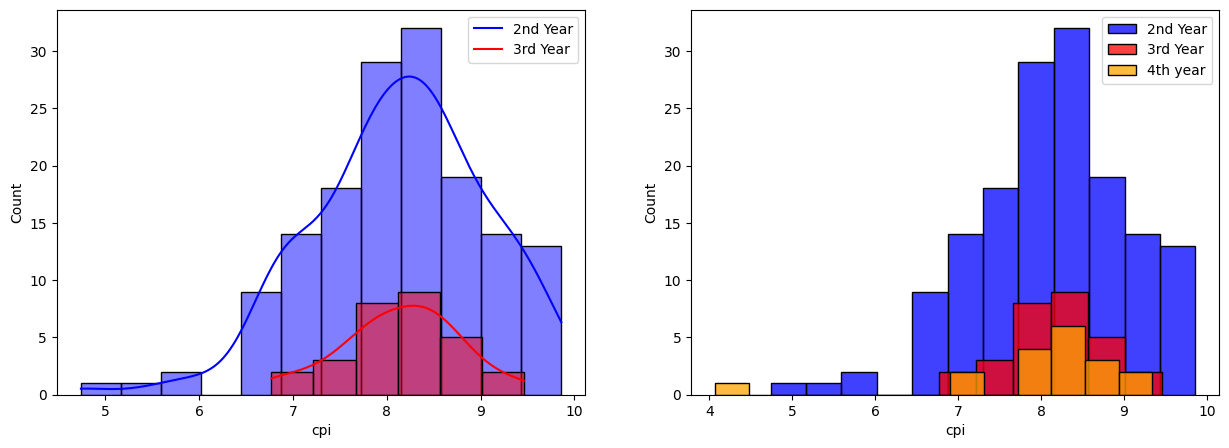

In [28]:
print('Count of students in each year')
print(df['year'].value_counts(dropna=False))

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(df[df['year'] == '2nd']['cpi'], color='blue', kde=True)
sns.histplot(df[df['year'] == '3rd']['cpi'], color='red', kde=True)
plt.legend(labels=['2nd Year', '3rd Year'])

plt.subplot(1,2,2)
sns.histplot(df[df['year'] == '2nd']['cpi'], color='blue')
sns.histplot(df[df['year'] == '3rd']['cpi'], color='red')
sns.histplot(df[df['year'] == '4th']['cpi'], color='orange')
plt.legend(labels=['2nd Year', '3rd Year', '4th year'])

plt.show()

There are too few students in 1st year whose data is available, we can draw meaningful conclusions only from 2nd, 3rd & 4th year students data.

Here we can notice that the most frequent cpi range of 2nd and 3rd year students is similar but there are far fewer students in 9+ CPI range in 3rd year than in 2nd year, this also makes sense since it is harder to maintain a high CPI over the years.

### How relationships affect CPI?

Relationship status of students:
relationship
Single          157
relationship     41
complicated      27
NaN               2
Name: count, dtype: int64


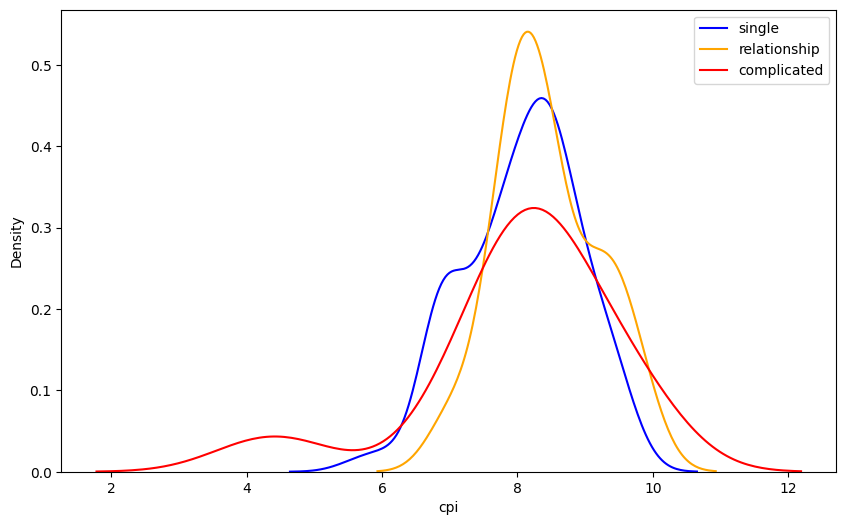

In [15]:
print('Relationship status of students:')
print(df['relationship'].value_counts(dropna=False))

plt.figure(figsize=(10,6))

sns.kdeplot(df[df['relationship'] == 'Single']['cpi'], color='blue')
sns.kdeplot(df[df['relationship'] == 'relationship']['cpi'], color='orange')
sns.kdeplot(df[df['relationship'] == 'complicated']['cpi'], color='red')
plt.legend(labels=['single', 'relationship', 'complicated'])

plt.show()

Conclusion: On average CPI is not affected by relationship status, all the peaks for different relationship status are at approximately same CPI.

However some interesting observations are;
- People in relationships either have CPI in the avg range (around 8.2 ± 0.2) or in the high CPI range (9+)
- Some people whose relationship status is "complicated" have low CPI (4-5)

In [16]:
print(f"Percent of students in relationship with 9+ CPI: {(df[df['relationship'] == 'relationship']['cpi'] > 9).sum()/(df['cpi'] > 9).sum()*100}%")
print(f"Percent of students with 9+ CPI {(df['cpi'] > 9).sum()/(df['cpi'] != 0).sum()*100:.2f}%")

Percent of students in relationship with 9+ CPI: 31.25%
Percent of students with 9+ CPI 14.10%


The number of students who believe in regular study and all nighters in approximately same.

The distribution of cpi of studetnts who do all nighters and those who study regularly is mostly similar. So, this actually suggests that studying regularly or doing all nighters does not significantly affect yours cpi. 

## How students of different years think differently

### Are seniors satisfied with IITG? 

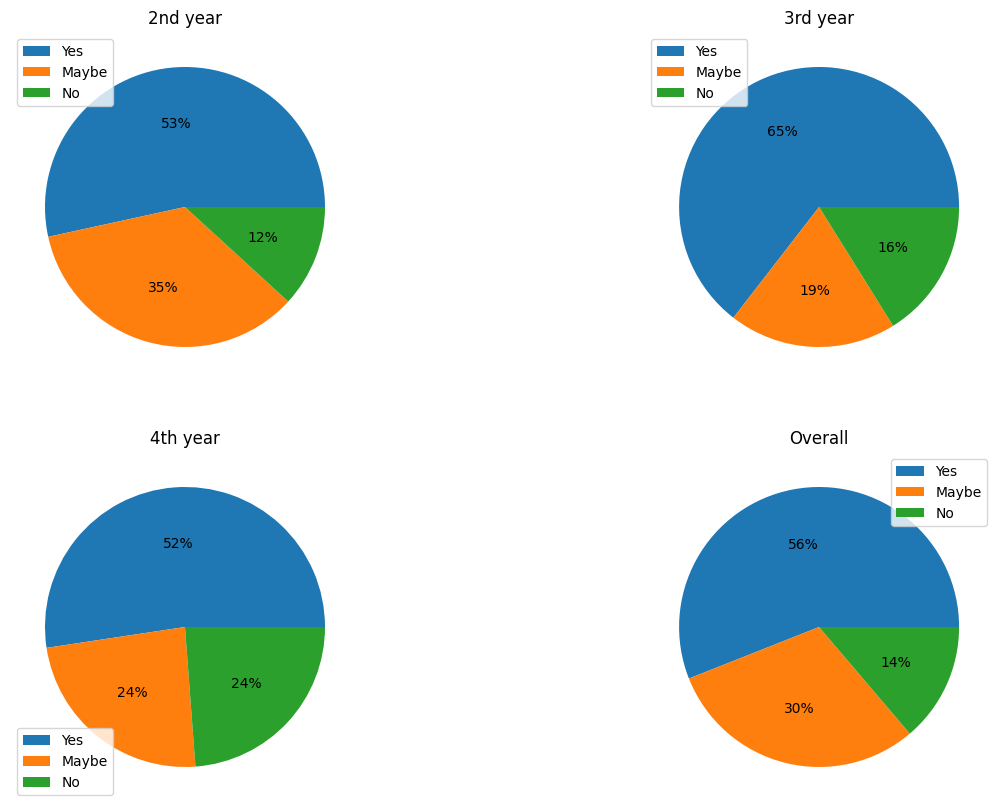

In [18]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('2nd year')
plt.pie(df[df['year'] == '2nd']['satisfied'].value_counts(), autopct='%.0f%%')
plt.legend(labels=['Yes', 'Maybe', 'No'])

plt.subplot(2,2,2)
plt.title('3rd year')
plt.pie(df[df['year'] == '3rd']['satisfied'].value_counts(), autopct='%.0f%%')
plt.legend(labels=['Yes', 'Maybe', 'No'])

plt.subplot(2,2,3)
plt.title('4th year')
plt.pie(df[df['year'] == '4th']['satisfied'].value_counts(), autopct='%.0f%%')
plt.legend(labels=['Yes', 'Maybe', 'No'])

plt.subplot(2,2,4)
plt.title('Overall')
plt.pie(df['satisfied'].value_counts(), autopct='%.0f%%')
plt.legend(labels=['Yes', 'Maybe', 'No'])

plt.show()

### Favorite place to eat

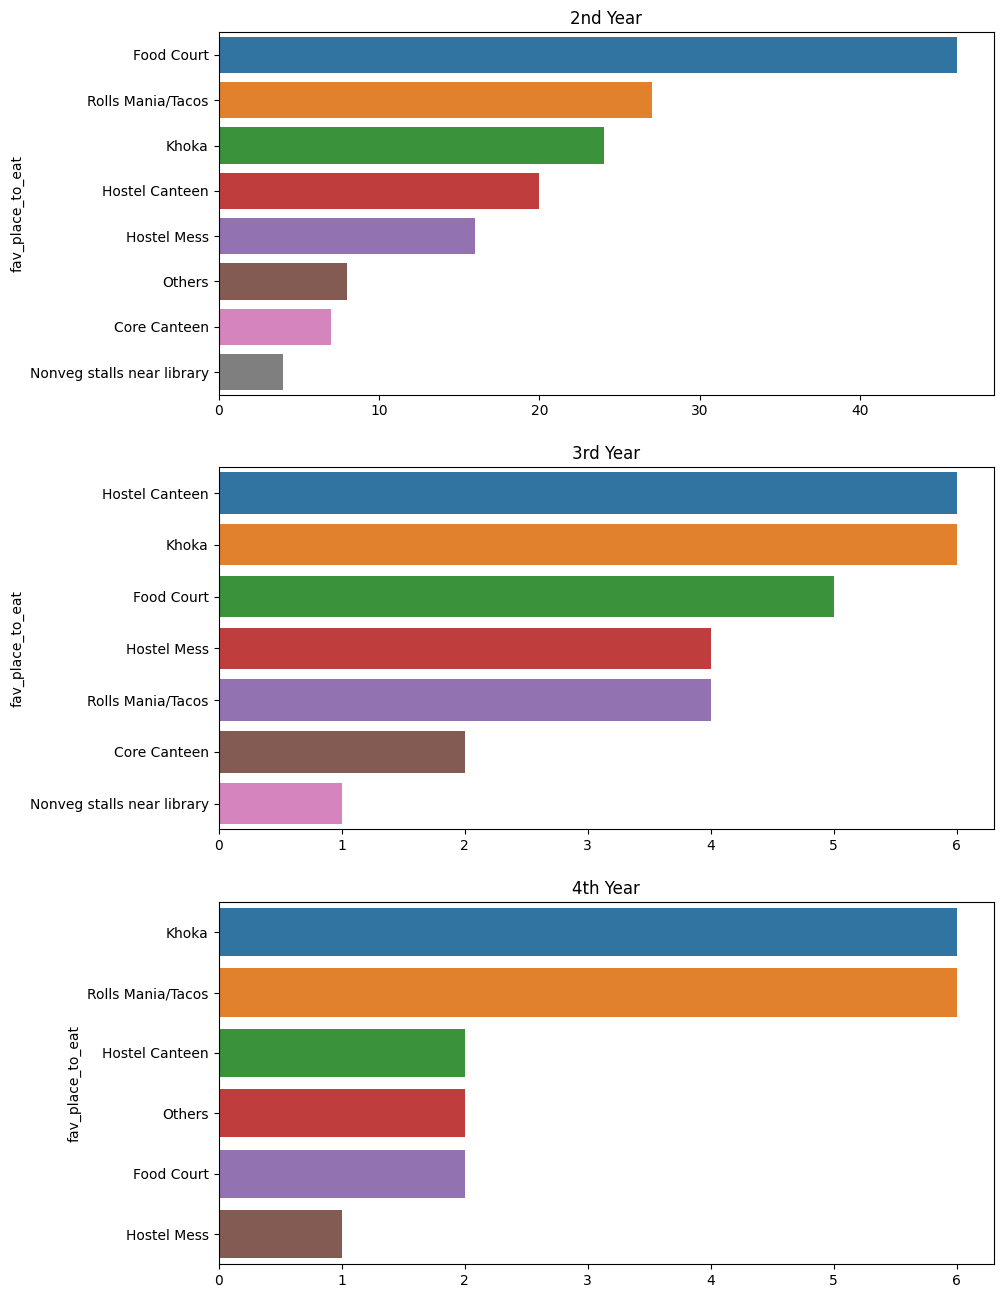

In [20]:
plt.figure(figsize=(10,16))
    
plt.subplot(3,1,1)
plt.title('2nd Year')
sns.barplot(x=df[df['year'] == '2nd']['fav_place_to_eat'].value_counts().values, y=df[df['year'] == '2nd']['fav_place_to_eat'].value_counts().keys(), orient='h')

plt.subplot(3,1,2)
plt.title('3rd Year')
sns.barplot(x=df[df['year'] == '3rd']['fav_place_to_eat'].value_counts().values, y=df[df['year'] == '3rd']['fav_place_to_eat'].value_counts().keys(), orient='h')

plt.subplot(3,1,3)
plt.title('4th Year')
sns.barplot(x=df[df['year'] == '4th']['fav_place_to_eat'].value_counts().values, y=df[df['year'] == '4th']['fav_place_to_eat'].value_counts().keys(), orient='h')

plt.show()


Interesting trends:
- As the years pass, the numper of people who prefer food court reduces
- Eventually khoka becomes the majority's favorite place to eat

## Favorite Clubs

In [30]:
df['fav_club'].value_counts()

fav_club
Coding_Club                 85
E_cell                      17
iitg.ai                     17
Finance_and_Economics       10
Consulting_and_Analytics     9
Cadence                      9
Xpressions                   8
Robotics                     7
Aeromodelling                7
IITG_Racing                  6
Alcher                       5
Equinox                      5
Game_dev_and_E-sports        4
Octaves                      4
Montage                      4
Palates                      3
Acumen(Quiz_Club)            3
Anchoring_Club               2
Lit_Soc                      2
Prakriti                     2
Electronics_Club             1
Whitespace                   1
Fine_Arts_club               1
4i_labs                      1
Name: count, dtype: int64

In [22]:
%%capture
!pip install wordcloud
from wordcloud import WordCloud

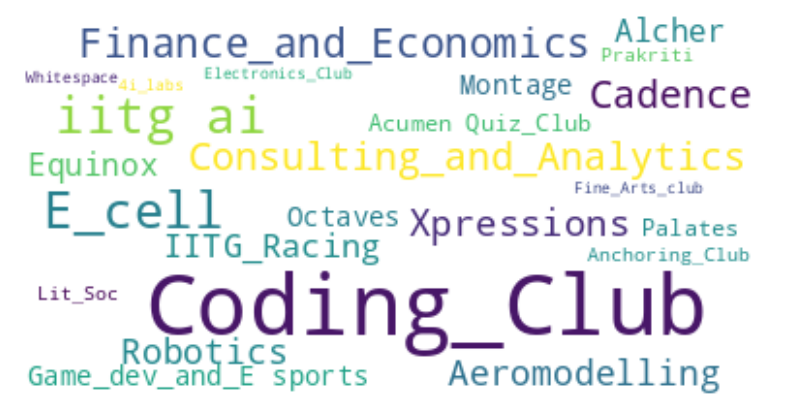

In [32]:
df['fav_club'] = df['fav_club'].str.replace(' ', '_')

words = ''
for i in df['fav_club'].dropna().to_list():
    words += i + ' '

wordcloud = WordCloud(background_color ='white').generate(words)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

Word cloud visualization of everyone's favorite clubs

## Coding club seems to be everyone's favorite 🙂